In [1]:
import glob
import csv

In [2]:
def converttodict(st):
    temp=st.split("'")
    returnarray=[0,dict()]
    for x in temp:
        if len(x)<5:
            continue
        x=x.strip('{')
        x=x.split(':')
        if len(x)>2:
            returnarray[0]=x[0].strip('"')
            returnarray[1][int(x[1].strip('"{'))]=float(x[2])
        else:
            returnarray[1][int(x[0])]=float(x[1])
        #print(x)
    return returnarray

In [3]:
csvfiles=glob.glob('**/*.csv')
csvdicts={}
for csvf in csvfiles:
    with open(csvf,'r') as cs:
        reader=str(next(csv.reader(cs)))
        reader = reader.strip('[]').split('}')
        testdict=dict()
        for x in reader:
            #x=x.strip('{" ')
            returnarray=converttodict(x)
            if returnarray[0]==0: continue
            #print(returnarray)
            testdict[returnarray[0]]=returnarray[1]
        #print(testdict)
        
        csvdicts[csvf]=testdict
#print(csvdicts)
#print([len(list(x.keys())) for x in csvdicts.values()])

0.0 0.2146051377
0.0121709025 0.6762364507
0.0017070925 0.0261201017
0.0151330819 0.0286946204
0.0030811897 0.0030811897
0.0528864786 0.0528864786
0.0045022135 0.0064821544
0.0528867878 0.0543251596
0.0030811897 0.0030811897
0.0528864786 0.0528864786
0.0045022135 0.0045022135
0.0528867878 0.0528867878
0.0030811897 0.0030811897
0.0528864786 0.0528864786
0.0045022135 0.0047160171
0.0528867878 0.0534116328


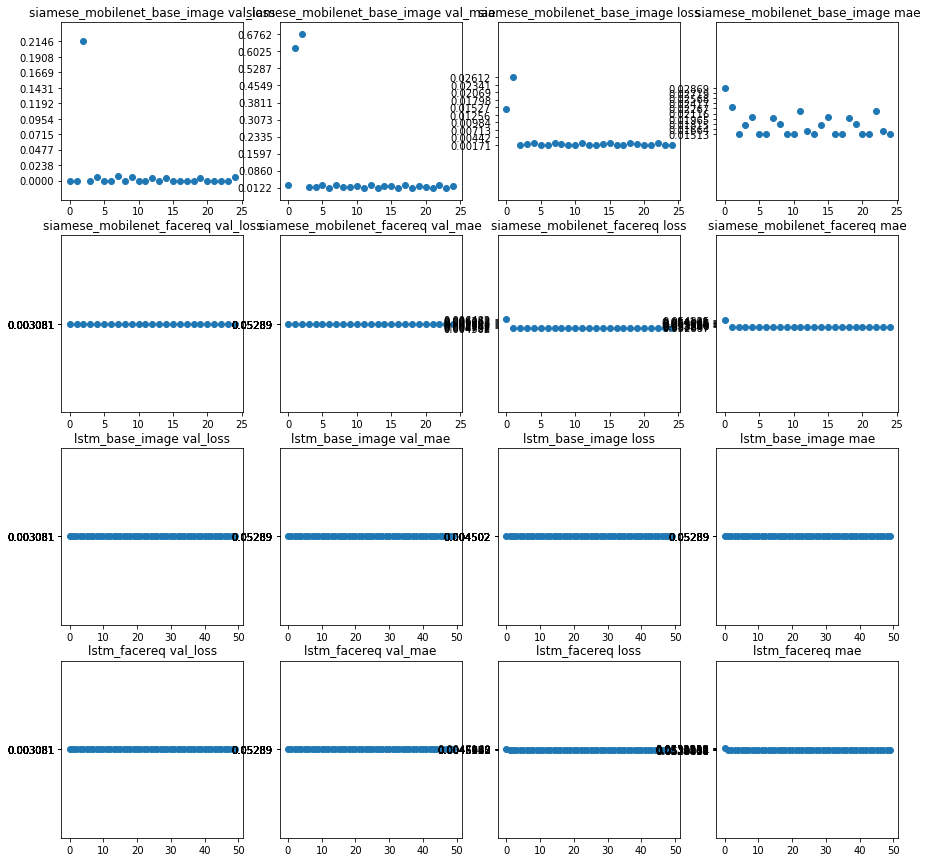

In [9]:
import matplotlib.pyplot as plt
import numpy as np
fig,axs=plt.subplots(len(csvdicts),4,figsize=(15,15))
for idx,(csv,csvdict) in enumerate(csvdicts.items()):
    for idx2,(metric,data) in enumerate(csvdict.items()):
        subplt=axs[idx,idx2]
        subplt.scatter(list(data.keys()),list(data.values()))
        subplt.set_title(csv.split('/')[0]+' '+metric)
        subplt.set_yticks(np.linspace(min(list(data.values())),max(list(data.values())),10))
        print(str(min(list(data.values())))+' '+ str(max(list(data.values()))))
#plt.tight_layout()
plt.show()    